# EDA of Archigos 4.1 (2009)
https://www.rochester.edu/college/faculty/hgoemans/Archigos_4.1.pdf

Author: Kevin Fulgham

A Note from the Author
Goal - to provide an outline for how some people might approach tackling a new dataset.

Data Set:
'Archigos  is a political  leaders & their states dataset. For  each  state  considered  an  independent state in the Gleditsch and Ward (1999) compilation of independent states,  Archigos identifies the effective primary ruler.  The data identify the manner by which rulers enter and leave political power, the post-tenure fate of the ruler, as well as other personal characteristics.'

Table of Contents:
- [Clean Data](#clean_data)
    - [Data Type](#data_types)
    - [Country & Region Codes](#country_code)
   
- [Data Exploration](#data_exploration)
    - [Regime Type Entry & Exit](#regime_type)
    - [Duration](#regime_type)

To get started, you want to make sure you have the following packages installed:

    numpy (numerical manipulation/calculation) (Version 1.18.1)
    pandas (dataframe manipulation - simple tabular formats)(Version 1.0.1)
    sci-kit learn (machine learning)(Version 0.22.1)
    sciy.stats chi2_contingency (chi squared categorical)(1.4.1)
    matplotlib (basic data visualization)(3.1.3)
    seaborn (shinier data visualization)(0.10.0)


### Import the Libraries 

In [1]:
import numpy as np
import pandas as pd
import sklearn
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
%matplotlib inline

### Set View Options to Display Rows & Columns

In [2]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Load the Data 

Archigos_4.1 is saved as a Stata ('dta') file in the University of Rochester website 

In [3]:
df = pd.read_stata('Archigos_4.1.dta')
df.head()

/Users/administrator/anaconda3/lib/python3.6/site-packages/pandas/io/stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,ebirthdate,deathdate,edeathdate,dbpediauri,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,NaT,1885-07-23,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,NaT,1893-01-17,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-03-04,1881-09-19,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,NaT,1881-09-19,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,0,3.0,11,3.0,NA,NA
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,NaT,1886-11-18,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,NaT,1908-06-24,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA


In [4]:
df.shape

(3409, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3408
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   obsid              3409 non-null   object        
 1   leadid             3409 non-null   object        
 2   ccode              3409 non-null   int16         
 3   idacr              3409 non-null   object        
 4   leader             3409 non-null   object        
 5   startdate          3409 non-null   object        
 6   eindate            3409 non-null   datetime64[ns]
 7   enddate            3409 non-null   object        
 8   eoutdate           3409 non-null   datetime64[ns]
 9   entry              3409 non-null   object        
 10  exit               3409 non-null   object        
 11  exitcode           3409 non-null   object        
 12  prevtimesinoffice  3409 non-null   int8          
 13  posttenurefate     3409 non-null   object        
 14  gender  

## Clean the Data <a class="anchor" id="clean_data"></a>

### Data Types <a class="anchor" id="data_types"></a>

Looking at the data, the Archigos datset contains categorical dummy coding, and time-date information, not all of it converted directly from the DTA in the preferred dtype

In [6]:
df["ccode"] = df['ccode'].astype('object')
df["startdate"] = df['startdate'].astype('datetime64[ns]')
df["enddate"] = df['enddate'].astype('datetime64[ns]')
df["numentry"] = df['numentry'].astype('category')
df["numexit"] = df['numexit'].astype('category')
df["numposttenurefate"] = df['numposttenurefate'].astype('category')
df["ftcur"] = df['ftcur'].astype('category')
df.dtypes

obsid                        object
leadid                       object
ccode                        object
idacr                        object
leader                       object
startdate            datetime64[ns]
eindate              datetime64[ns]
enddate              datetime64[ns]
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
ebirthdate           datetime64[ns]
deathdate                    object
edeathdate           datetime64[ns]
dbpediauri                   object
numentry                   category
numexit                    category
numexitcode                   int16
numposttenurefate          category
fties                        object
ftcur                      c

In [7]:
df.isnull().sum()

obsid                   0
leadid                  0
ccode                   0
idacr                   0
leader                  0
startdate               0
eindate                 0
enddate                 0
eoutdate                0
entry                   0
exit                    0
exitcode                0
prevtimesinoffice       0
posttenurefate          0
gender                  0
yrborn                  0
yrdied                  0
borndate                0
ebirthdate           1289
deathdate               0
edeathdate           2563
dbpediauri              0
numentry                0
numexit                 0
numexitcode             0
numposttenurefate       0
fties                   0
ftcur                   0
dtype: int64

In [8]:
# There is 75% of edeathdate and 37% of eborndate as null values. They will be dropped
df.isnull().sum()/len(df)

obsid                0.000000
leadid               0.000000
ccode                0.000000
idacr                0.000000
leader               0.000000
startdate            0.000000
eindate              0.000000
enddate              0.000000
eoutdate             0.000000
entry                0.000000
exit                 0.000000
exitcode             0.000000
prevtimesinoffice    0.000000
posttenurefate       0.000000
gender               0.000000
yrborn               0.000000
yrdied               0.000000
borndate             0.000000
ebirthdate           0.378117
deathdate            0.000000
edeathdate           0.751833
dbpediauri           0.000000
numentry             0.000000
numexit              0.000000
numexitcode          0.000000
numposttenurefate    0.000000
fties                0.000000
ftcur                0.000000
dtype: float64

Given the number of rows with incomplete ebirthdate and edeathdate, I removed these rows
Clean Data on Death Date and Birth Date - Remove the 'NA' and 'NaT' Values

In [9]:
#ebirthdate', 'edeathdate','dbpediauri contain too many missing values, so they are dropped
df = df.drop(['ebirthdate', 'edeathdate','dbpediauri'], axis=1)
df.dtypes

obsid                        object
leadid                       object
ccode                        object
idacr                        object
leader                       object
startdate            datetime64[ns]
eindate              datetime64[ns]
enddate              datetime64[ns]
eoutdate             datetime64[ns]
entry                        object
exit                         object
exitcode                     object
prevtimesinoffice              int8
posttenurefate               object
gender                       object
yrborn                        int16
yrdied                        int16
borndate                     object
deathdate                    object
numentry                   category
numexit                    category
numexitcode                   int16
numposttenurefate          category
fties                        object
ftcur                      category
dtype: object

In [10]:
#As we can see that there are some rows with 'NA' in the born and death dates of their leaders. 
#In the borndate, it could be that these records are incomplete, 
#in deathdate, it is possible that the leaders are still alive, so we will only drop the borndates

print(df['borndate'] == 'NA')

print('\n')

print(df['deathdate'] == 'NA')


0        True
1        True
2        True
3        True
4        True
        ...  
3404     True
3405    False
3406     True
3407     True
3408    False
Name: borndate, Length: 3409, dtype: bool


0       False
1       False
2       False
3       False
4       False
        ...  
3404     True
3405     True
3406     True
3407     True
3408     True
Name: deathdate, Length: 3409, dtype: bool


In [11]:
df = df[df.borndate != 'NA']

In [12]:
#From this data table, it appears that are some unusual data values in yrborn and yeardied, when the min year = -999. 
#I would suspect that there maybe values missing, dummy coded data, or NaN data
df.describe()

,prevtimesinoffice,yrborn,yrdied,numexitcode
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,0.314474,1903.794437,1146.938708,-86.618105
std,0.730484,37.787130,1251.680370,270.660334
min,0.000000,1797.000000,-999.000000,-999.000000
25%,0.000000,1874.000000,-777.000000,0.000000
50%,0.000000,1908.000000,1941.000000,0.000000
75%,0.000000,1935.000000,1978.000000,0.000000
max,6.000000,1983.000000,2014.000000,111.000000


### Country & World Region Codes <a class="anchor" id="country_code"></a>

In [13]:
#IDACR code is a county code found in the Correlations of War: http://www.correlatesofwar.org/data-sets, However we will convert them in more common ISO country code set
df.idacr.unique()

array(['USA', 'CAN', 'BHM', 'CUB', 'HAI', 'DOM', 'JAM', 'TRI', 'BAR',
       'MEX', 'BLZ', 'GUA', 'HON', 'SAL', 'NIC', 'COS', 'PAN', 'COL',
       'VEN', 'GUY', 'SUR', 'ECU', 'PER', 'BRA', 'BOL', 'PAR', 'CHL',
       'ARG', 'URU', 'UKG', 'IRE', 'NTH', 'BEL', 'LUX', 'FRN', 'SWZ',
       'SPN', 'POR', 'GMY', 'GFR', 'GDR', 'POL', 'AUH', 'AUS', 'HUN',
       'CZE', 'CZR', 'SLO', 'ITA', 'MLT', 'ALB', 'SER', 'MAC', 'CRO',
       'YUG', 'BOS', 'KOS', 'SLV', 'GRC', 'CYP', 'BUL', 'MLD', 'RUM',
       'RUS', 'EST', 'LAT', 'LIT', 'UKR', 'BLR', 'ARM', 'GRG', 'AZE',
       'FIN', 'SWD', 'NOR', 'DEN', 'ICE', 'CAP', 'GNB', 'EQG', 'GAM',
       'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI', 'GUI', 'BFO', 'LBR',
       'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN', 'CHA', 'CON',
       'DRC', 'UGA', 'KEN', 'TAZ', 'BUI', 'RWA', 'SOM', 'DJI', 'ETH',
       'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW', 'SAF', 'TRA', 'NAM',
       'LES', 'BOT', 'SWA', 'MAG', 'COM', 'MAS', 'MOR', 'ALG', 'TUN',
       'LIB', 'SUD',

Rename Country and World Regions using the more widely accepted United Nations GeoScheme
: https://unstats.un.org/unsd/methodology/m49/ and International Standard of Organization 3 Letter Country Codes : https://www.iso.org/iso-3166-country-codes.html


In [14]:
country = {'USA':'United States', 'CAN':'Canada', 'BHM': 'Bahamas','CUB':'Cuba','HAI':'Haiti',
           'DOM':'Dominican Republic','JAM':'Jamaica','TRI':'Trinidad Tobago','BAR':'Barbados',
           'MEX':'Mexico', 'BLZ':'Belize','GUA':'Guatamala','HON':'Honduras','SAL':'El Salvador',
           'NIC':'Nicaragua','COS':'Costa Rica','PAN':'Panama','COL':'Colombia','VEN':'Venezuela',
           'GUY':'Guyana','SUR':'Suriname','ECU':'Ecuador','PER':'Peru','BRA':'Brazil','BOL':'Bolivia',
           'PAR':'Paraguay','CHL':'Chile','ARG':'Argentina','URU':'Uruguay','UKG':'United Kingdom',
           'IRE':'Ireland','NTH':'Netherlands','BEL':'Belgium','LUX':'Luxembourg','FRN':'France',
           'SWZ':'Switzerland','SPN':'Spain','POR':'Portugal','BAV':'Bavaria','GMY':'Germany',
           'GFR':'German Federal Republic','GDR':'German Democratic Republic','POL':'Poland',
           'AUH':'Austria Hungary','AUS':'Austria','HUN':'Hungary','CZE':'Czechoslovakia','CZR': 'Czech Republic',
           'SLO':'Slovakia','ITA':'Italy','MLT':'Malta','ALB':'Albania','SER':'Serbia','MNG':'Montenegro',
           'MAC':'Republic of Northern Macedonia','CRO':'Croatia','YUG':'Yugoslavia','BOS':'Bosnia',
           'KOS':'Kosovo','SLV':'Slovenia','GRC':'Greece','CYP':'Cyprus','BUL':'Bulgaria','MLD':'Moldova',
           'RUM':'Romania','RUS':'Russia','EST':'Estonia','LAT':'Latvia','LIT':'Lithuania','UKR':'Ukraine',
           'BLR':'Belarus','ARM':'Armenia','GRG':'Georgia','AZE':'Azerbaijan','FIN':'Finland',
           'SWD':'Sweden','NOR':'Norway','DEN':'Denmark','ICE':'Iceland','CAP':'Cape Verde',
           'GNB':'Guinea-Bissau','EQG':'Equatorial Guinea','GAM':'Gambia','MLI':'Mali','SEN':'Senegal',
           'BEN':'Benin','MAA':'Mauritania','NIR':'Niger','CDI':'Ivory Coast','GUI':'Guinea','BFO':'Burkina Faso',
           'LBR':'Liberia','SIE':'Sierra Leone','GHA':'Ghana','TOG':'Togo','CAO':'Cameroon','NIG':'Nigeria',
           'GAB':'Gabon','CEN':'Centeral Africa Republic','CHA':'Chad','CON':'Republic of Congo',
           'DRC':'Democratic Republic of Congo','UGA':'Uganda','KEN':'Kenya','TAZ':'Tanzania','ZAN':'Zanzibar',
           'BUI':'Burundi','RWA':'Rwanda','SOM':'Somalia','DJI':'Djbouti','ETH':'Ethopia','ERI':'Eriteria',
           'ANG':'Angola','MZM':'Mozambique','ZAM':'Zambia','ZIM':'Zimbabwe','MAW':'Malawi','SAF':'South Africa',
           'TRA':'Transvaal','OFS':'Orange Free State','NAM':'Nambibia','LES':'Lesotho','BOT':'Botswana',
           'SWA':'Swaziland','MAG':'Madagascar','COM':'Comorros','MAS':'Mauritius','MOR':'Morocco',
           'ALG':'Algeria','TUN':'Tunisia','LIB':'Libya','SUD':'Sudan','SSD':'South Sudan','IRN':'Iran',
           'TUR':'Turkey','IRQ':'Iraq','EGY':'Egypt','SYR':'Syria','LEB':'Lebanon','JOR':'Jordan',
           'ISR':'Israel','SAU':'Saudi Arabia','YEM':'Yemen','YPR':'Yemen Peoples Republic',
           'KUW':'Kuwait','BAH':'Bahrain','QAT':'Qatar','UAE':'United Arab Emirates','OMA':'Oman',
           'AFG':'Afghanistan','TKM':'Turkmenistan','TAJ':'Tajikistan','KYR':'Kyrgyzstan','UZB':'Uzbekistan',
           'KZK':'Kazakhstan',
           
           'CHN':'China','TBT':'Tibet','MON':'Mongalia','TAW':'Taiwan','KOR':'Korea','PRK':'Peoples Republic of Korea',
           'ROK':'Republic of Korea','JPN':'Japan','IND':'India','BHU':'Bhutan','PAK':'Pakistan',
           'BNG':'Bangladesh','SRI':'Sri Lanka','MAD':'Maldives','NEP':'Nepal','THI':'Thailand',
           'CAM':'Cambodia','LAO':'Laos','VNM':'Vietnam','DRV':'Vietnam','RVN':'Republic of Vietnam',
           'VIE':'Vietnam','MAL':'Malaysia','SIN':'Singapore','BRU':'Brunei','PHI':'Philippines','MYA':'Myanmar',
           'INS':'Indonesia', 'ETM':'East Timor','AUL':'Australia','PNG':'Papua New Guinea','NEW':'New Zealand',
           'SOL':'Solomon Islands','FJI':'Fiji'}

worldregion = {'USA':'North America','CAN':'North America','BHM':'Caribbean','CUB':'Caribbean','HAI':'Caribbean',
               'DOM':'Caribbean','JAM':'Caribbean','TRI':'Caribbean','BAR':'Caribbean',
               'MEX':'Central America','BLZ':'Central America','GUA':'Central America','HON':'Central America',
               'SAL':'Central America','NIC':'Central America','COS':'Central America','PAN':'Central America',
               'COL':'South America','VEN':'South America','GUY':'South America','SUR':'South America',
               'ECU':'South America','PER':'South America','BRA':'South America','BOL':'South America',
               'PAR':'South America','CHL':'South America','ARG':'South America','URU':'South America',
            
               'UKG':'Northern Europe','IRE':'Northern Europe','NTH':'Western Europe','BEL':'Western Europe',
               'LUX':'Western Europe','FRN':'Western Europe','SWZ':'Western Europe','SPN':'Southern Europe',
               'POR':'Southern Europe','BAV':'Western Europe','GMY':'Western Europe','GFR':'Western Europe',
               'GDR':'Western Europe','POL':'Eastern Europe','AUH':'Eastern Europe','AUS':'Western Europe',
               'HUN':'Eastern Europe','CZE':'Eastern Europe','CZR':'Eastern Europe','SLO':'Eastern Europe',
               'ITA':'Southern Europe','MLT':'Southern Europe','ALB':'Southern Europe','SER':'Southern Europe',
               'MNG':'Southern Europe','MAC':'Southern Europe','CRO':'Southern Europe','YUG':'Southern Europe',
               'BOS':'Eastern Europe','KOS':'Eastern Europe','SLV':'Eastern Europe','GRC':'Southern Europe',
               'CYP':'Western Asia','BUL':'Eastern Europe','MLD':'Eastern Europe','RUM':'Eastern Europe',
               'RUS':'Eastern Europe','EST':'Northern Europe','LAT':'Northern Europe','LIT':'Northern Europe',
               'UKR':'Eastern Europe','BLR':'Eastern Europe','ARM':'Western Asia','GRG':'Southern Europe',
               'AZE':'Western Asia','FIN':'Northern Europe','SWD':'Northern Europe','NOR':'Northern Europe',
               'DEN':'Northern Europe','ICE':'Northern Europe',
               
               'CAP':'Western Africa','GNB':'Western Africa','EQG':'Western Africa','GAM':'Western Africa',
               'MLI':'Western Africa','SEN':'Western Africa','BEN':'Western Africa','MAA':'Western Africa',
               'NIR':'Western Africa','CDI':'Western Africa','EGY':'Northern Africa',
               'GUI':'Western Africa','BFO':'Western Africa','LBR':'Western Africa','SIE':'Western Africa',
               'GHA':'Western Africa','TOG':'Western Africa','CAO':'Western Africa','NIG':'Western Africa',
               
               'GAB':'Middle Africa','CEN':'Middle Africa','CHA':'Middle Africa','CON':'Middle Africa',
               'DRC':'Middle Africa','UGA':'Eastern Africa','KEN':'Eastern Africa','TAZ':'Eastern Africa',
               'ZAN':'Eastern Africa','BUI':'Eastern Africa','RWA':'Eastern Africa','SOM':'Eastern Africa',
               'DJI':'Eastern Africa','ETH':'Eastern Africa','ERI':'Eastern Africa','ANG':'Middle Africa',
               'MZM':'Eastern Africa','ZAM':'Eastern Africa','ZIM':'Eastern Africa','MAW':'Eastern Africa',
               'SAF':'Southern Africa','TRA':'Southern Africa','OFS':'Southern Africa','NAM':'Southern Africa',
               'LES':'Southern Africa','BOT':'Southern Africa','SWA':'Southern Africa','MAG':'Eastern Africa',
               'COM':'Eastern Africa','MAS':'Eastern Africa','MOR':'Northern Africa','ALG':'Northern Africa',
               'TUN':'Northern Africa','LIB':'Northern Africa','SUD':'Northern Africa','SSD':'Northern Africa',
               
               'IRN':'Southern Asia','TUR':'Western Asia','IRQ':'Western Asia',
               'SYR':'Western Asia','LEB':'Western Asia','JOR':'Western Asia','ISR':'Western Asia',
               'SAU':'Western Asia','YEM':'Western Asia','YPR':'Western Asia','KUW':'Western Asia',
               'BAH':'Western Asia','QAT':'Western Asia','UAE':'Western Asia','OMA':'Western Asia',
               'AFG':'Southern Asia','TKM':'Central Asia','TAJ':'Central Asia','KYR':'Central Asia',
               'UZB':'Central Asia','KZK':'Central Asia','CHN':'Eastern Asia','TBT':'Southern Asia','MON':'Eastern Asia',
               'TAW':'Eastern Asia','KOR':'Eastern Asia','PRK':'Eastern Asia','ROK':'Eastern Asia','JPN':'Eastern Asia',
               'IND':'Southern Asia','BHU':'Southern Asia','PAK':'Southern Asia','BNG':'Southern Asia',
               'SRI':'Southern Asia','MAD':'Southern Asia','NEP':'Southern Asia','THI':'Southeastern Asia',
               'CAM':'Southeastern Asia','LAO':'Southeastern Asia','VNM':'Southeastern Asia',
               'DRV':'Southeastern Asia','RVN':'Southeastern Asia','VIE':'Southeastern Asia',
               'MAL':'Southeastern Asia','SIN':'Southeastern Asia','BRU':'Southeastern Asia',
               'PHI':'Southeastern Asia','INS':'Southeastern Asia','ETM':'Southeastern Asia',
               'MYA':'Southeastern Asia',
               'AUL':'Oceania','PNG':'Oceania','NEW':'Oceania','SOL':'Oceania','FJI':'Oceania'      
              }
df['countrynames'] = df['idacr'].map(country)
df['worldregion'] = df['idacr'].map(worldregion)
working_data = df.rename(columns = {'idacr':'iso',})

In [15]:
df.columns

Index(['obsid', 'leadid', 'ccode', 'idacr', 'leader', 'startdate', 'eindate', 'enddate', 'eoutdate', 'entry', 'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate', 'gender', 'yrborn', 'yrdied', 'borndate', 'deathdate', 'numentry', 'numexit', 'numexitcode', 'numposttenurefate', 'fties', 'ftcur', 'countrynames', 'worldregion'], dtype='object')

In [17]:
working_data = df.drop(['startdate', 'enddate','numentry','numexit','numexitcode','numposttenurefate','fties','ftcur'], axis =  1)
working_data.head()

,obsid,leadid,ccode,idacr,leader,eindate,eoutdate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,countrynames,worldregion
26,USA-2009,824fc72f-1e42-11e4-b4cd-db5882bf8def,2,USA,Obama,2009-01-20,2015-12-31,Regular,Still in Office,Still in Office,0,Leader Still in Office,M,1961,-777,1961-08-04,NA,United States,North America
41,CAN-1948,81de78f4-1e42-11e4-b4cd-db5882bf8def,20,CAN,St. Laurent,1948-11-15,1957-06-21,Regular,Regular,Regular,0,OK,M,1882,1973,1882-02-01,NA,Canada,North America
42,CAN-1957,81de78f5-1e42-11e4-b4cd-db5882bf8def,20,CAN,Diefenbaker,1957-06-21,1963-04-22,Regular,Regular,Regular,0,OK,M,1895,1979,1895-09-18,NA,Canada,North America
43,CAN-1963,81de78f6-1e42-11e4-b4cd-db5882bf8def,20,CAN,Pearson,1963-04-22,1968-04-20,Regular,Regular,Regular,0,OK,M,1897,1972,1897-04-23,NA,Canada,North America
44,CAN-1968,81de78f7-1e42-11e4-b4cd-db5882bf8def,20,CAN,Pierre Trudeau,1968-04-20,1979-06-04,Regular,Regular,Regular,0,OK,M,1919,2000,1919-10-18,NA,Canada,North America


## Data Exploration <a class="anchor" id="data_exploration"></a>

In [18]:
#Which countries have the most number of regimes, ex. most changes in government leadership. 
#In the US, this would be a change in Presidency. 
#Note, this includes continous countries ex. DRC and Zaire would be coded differently. 

working_data.groupby('countrynames')['obsid'].nunique().sort_values(ascending = False)

countrynames
Switzerland                       105
Spain                              64
Italy                              64
France                             55
Japan                              49
Ecuador                            45
Argentina                          41
Sweden                             39
Bolivia                            37
Denmark                            37
Norway                             37
Australia                          35
United Kingdom                     34
Netherlands                        32
Chile                              31
Brazil                             30
Panama                             28
Venezuela                          28
Greece                             28
Belgium                            27
Thailand                           26
Colombia                           26
Costa Rica                         25
Mexico                             25
Uruguay                            25
Turkey                             24

Examing Different Countries is interesting. However, debating whetherthe Czech Republic or Slovakia is the successor state of Czechoslovakia is a headache, so I will investigate the larger geographic world regions, which are less prone to political movement.

In [19]:
working_data.groupby(['worldregion'])['obsid'].nunique().sort_values(ascending = False)

worldregion
South America        314
Western Europe       283
Northern Europe      249
Southern Europe      207
Central America      144
Eastern Europe       119
Southeastern Asia    104
Western Asia          99
Southern Asia         94
Western Africa        94
Eastern Asia          90
Caribbean             79
Oceania               71
Eastern Africa        64
Southern Africa       35
Northern Africa       32
Middle Africa         23
North America         11
Central Asia           9
Name: obsid, dtype: int64

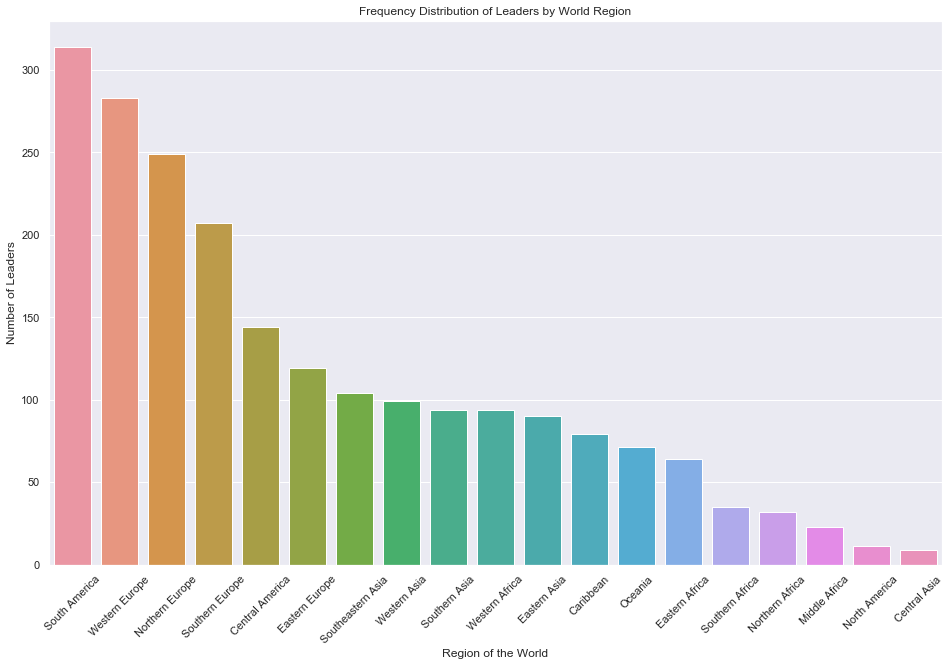

In [20]:
entry = working_data['worldregion'].value_counts()
sns.set(style="darkgrid")
sns.barplot(entry.index, entry.values)
plt.title('Frequency Distribution of Leaders by World Region')
plt.ylabel('Number of Leaders', fontsize=12)
plt.xlabel('Region of the World', fontsize=12)
plt.xticks (rotation =45)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

In [21]:
working_data.groupby('prevtimesinoffice')['obsid'].nunique().sort_values(ascending = False)

prevtimesinoffice
0    1668
1     321
2      82
3      26
4      17
5       6
6       1
Name: obsid, dtype: int64

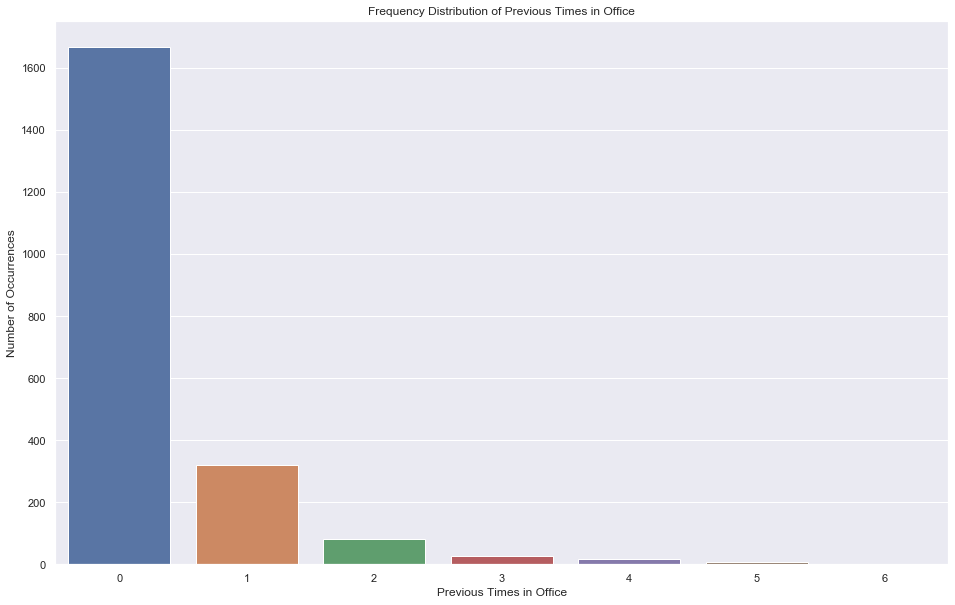

In [22]:
prevtimesinoffice = working_data['prevtimesinoffice'].value_counts()
sns.set(style="darkgrid")
sns.barplot(prevtimesinoffice.index, prevtimesinoffice.values)
plt.title('Frequency Distribution of Previous Times in Office')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Previous Times in Office', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

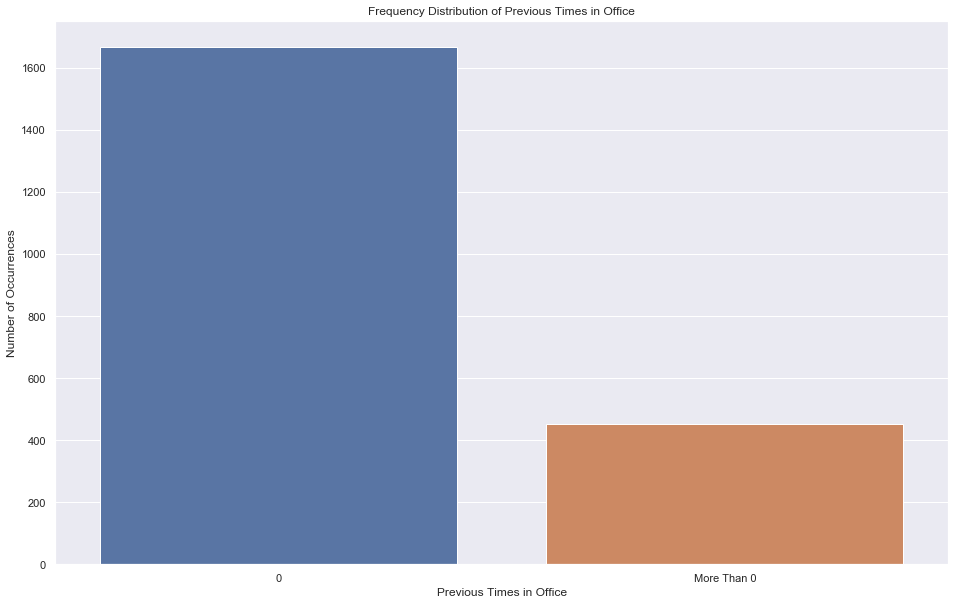

In [23]:
working_data['prevtimesinoffice'] = working_data['prevtimesinoffice'].apply(lambda x:'0' if x == 0 else 'More Than 0')
prevtimesinoffice = working_data['prevtimesinoffice'].value_counts()
sns.set(style="darkgrid")
sns.barplot(prevtimesinoffice.index, prevtimesinoffice.values)
plt.title('Frequency Distribution of Previous Times in Office')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Previous Times in Office', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

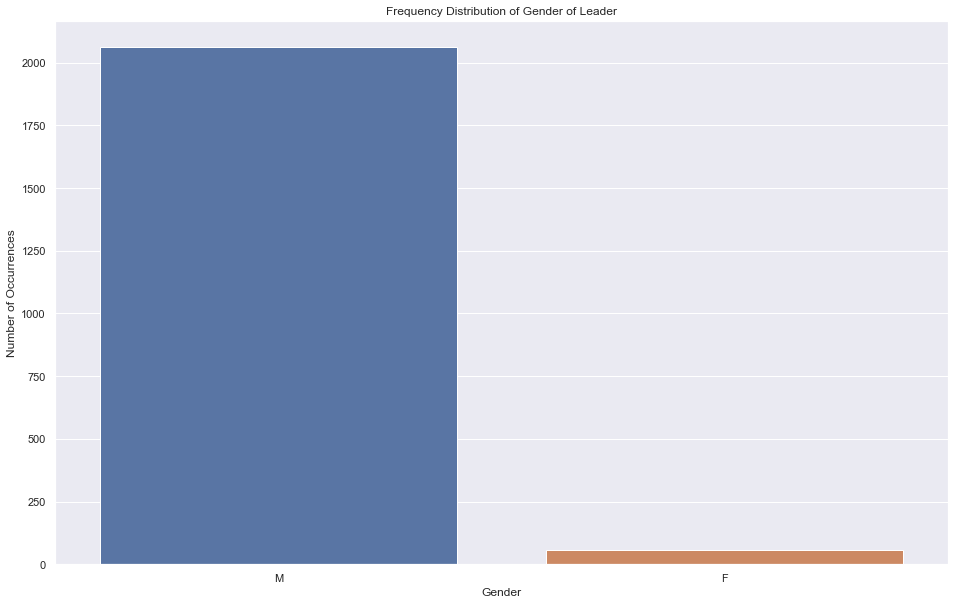

In [24]:
gender = working_data['gender'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gender.index, gender.values)
plt.title('Frequency Distribution of Gender of Leader')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

### Regime Types Entry and Exit  <a class="anchor" id="regime_type"></a>

In [25]:
#This section will look at regime types by their methods of entry:
#Regular (Elections), Irregular (Wars or Coups), Foreign Imposition (Foreign Based Coups)
working_data.groupby('entry')['obsid'].nunique().sort_values(ascending = False)

entry
Regular               1799
Irregular              301
Foreign Imposition      20
Unknown                  1
Name: obsid, dtype: int64

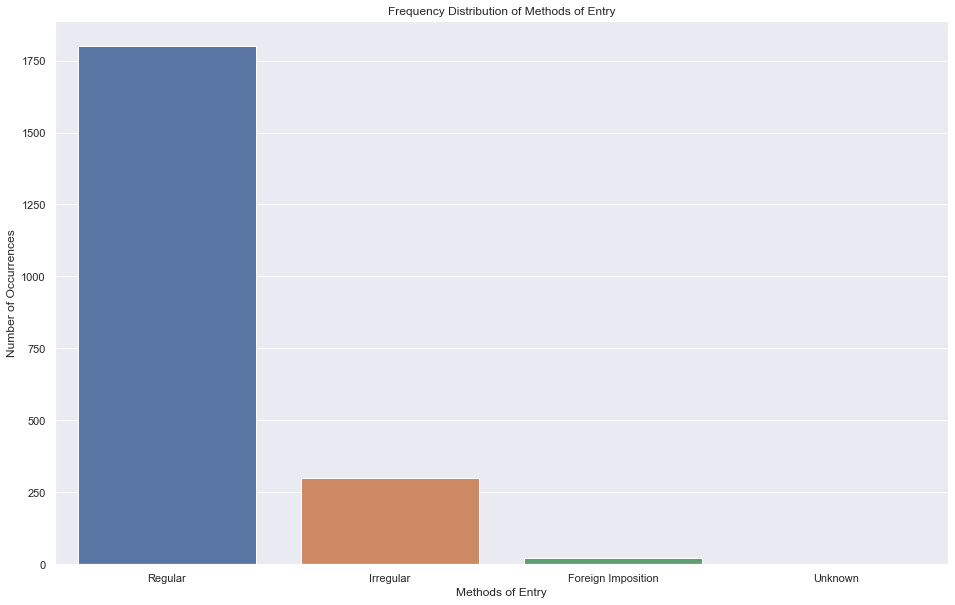

In [26]:
entry = working_data['entry'].value_counts()
sns.set(style="darkgrid")
sns.barplot(entry.index, entry.values)
plt.title('Frequency Distribution of Methods of Entry')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Methods of Entry', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

In [27]:
working_data.groupby('exit')['obsid'].nunique().sort_values(ascending = False)

exit
Regular                      1392
Irregular                     340
Still in Office               161
Natural Death                 130
Retired Due to Ill Health      49
Foreign                        45
Suicide                         3
Unknown                         1
Name: obsid, dtype: int64

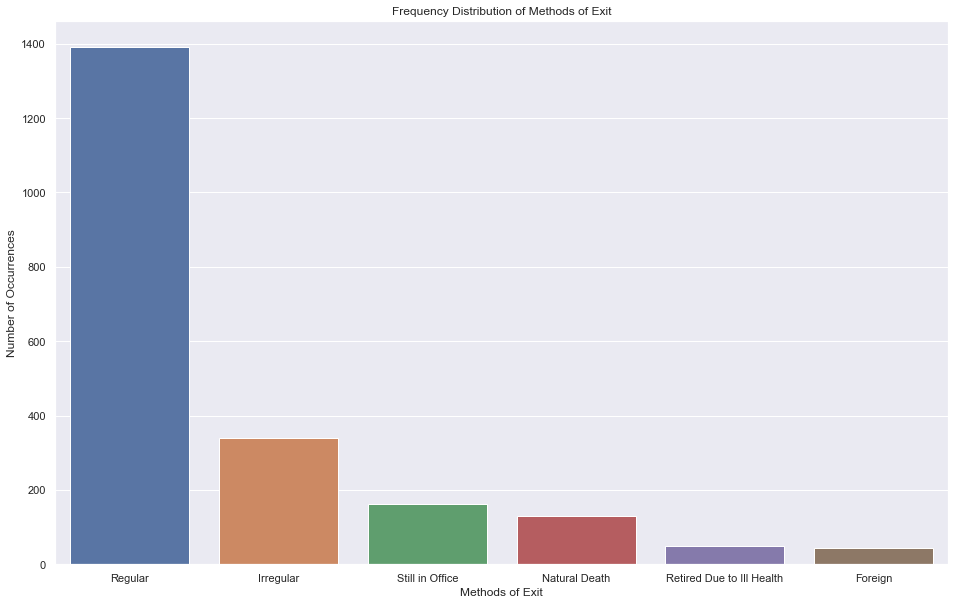

In [28]:
exit = working_data['exit'].value_counts()
exit= exit.drop(labels=['Unknown','Suicide'])
sns.set(style="darkgrid")
sns.barplot(exit.index, exit.values)
plt.title('Frequency Distribution of Methods of Exit')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Methods of Exit', fontsize=12)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

In [29]:
working_data.groupby('posttenurefate')['obsid'].nunique().sort_values(ascending = False)

posttenurefate
OK                                                           1371
Exile                                                         212
Leader Still in Office                                        160
Missing: Natural Death within Six Months of Losing Office     153
Imprisonment                                                  113
Death                                                          67
Missing: Left Office after 2014-12-31                          30
Missing: No Information Found                                  12
Suicide                                                         3
Name: obsid, dtype: int64

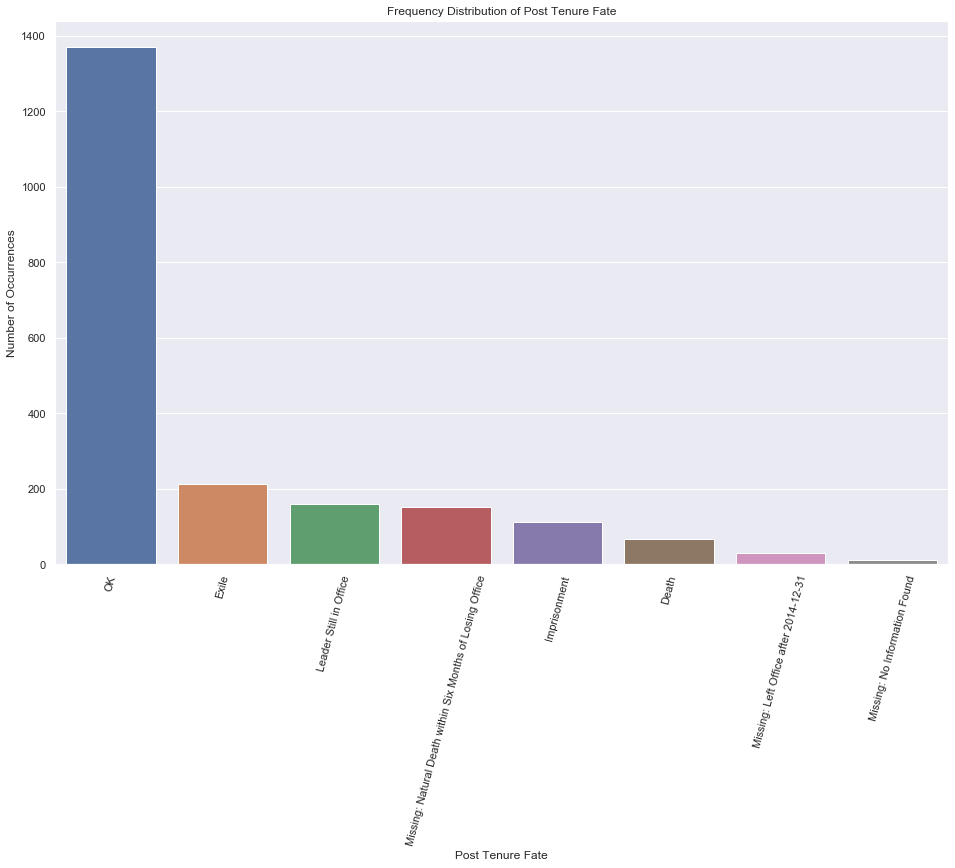

In [30]:
posttenurefate = working_data['posttenurefate'].value_counts()
posttenurefate = posttenurefate.drop(labels=['Suicide'])
sns.set(style="darkgrid")
sns.barplot(posttenurefate.index, posttenurefate.values)
plt.title('Frequency Distribution of Post Tenure Fate')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Post Tenure Fate', fontsize=12)
plt.xticks (rotation =75)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()

### Time & Duration

This section will examine the regime durations (in days) by their geographical location. This is to identify is certain geographic regions naturally have longer or shorter duration types

In [31]:
working_data['duration'] = (working_data['eoutdate'] - working_data['eindate']).dt.days

In [32]:
df_duration = working_data

In [33]:
print (df_duration.duration.mean(),'days')

1818.3814238566713 days


In [34]:
df_duration['duration'].min()

0

In [35]:
#Data Displayed in Days
df_durationavg = df_duration.groupby('worldregion').duration.mean().sort_values(ascending = False)
print(df_durationavg)

worldregion
Central Asia         4170.777778
Northern Africa      4090.906250
Middle Africa        3920.565217
Eastern Africa       3637.312500
Western Africa       3062.148936
Southern Africa      2783.057143
Western Asia         2768.656566
Southeastern Asia    2544.153846
Southern Asia        2492.382979
Eastern Europe       2203.033613
North America        2040.363636
Eastern Asia         1870.833333
Caribbean            1849.911392
Central America      1671.631944
Oceania              1482.704225
South America        1373.213376
Northern Europe      1248.546185
Southern Europe      1149.980676
Western Europe        996.201413
Name: duration, dtype: float64


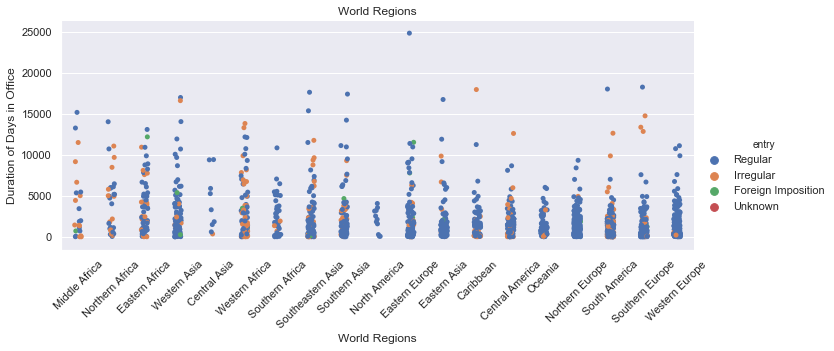

In [36]:
# This graph shows the Duration of "Types of Regime Entry" by World Regions. 

duration_graph = sns.catplot(x='worldregion', y='duration',hue ='entry', data = df_duration, height=4, aspect=2.5,
                                order = ['Middle Africa','Northern Africa','Eastern Africa',
                                'Western Asia','Central Asia','Western Africa','Southern Africa','Southeastern Asia',
                                'Southern Asia','North America','Eastern Europe','Eastern Asia','Caribbean','Central America',
                               'Oceania','Northern Europe','South America','Southern Europe','Western Europe']) 
sns.set(style="darkgrid")
plt.title('World Regions')
plt.ylabel('Duration of Days in Office', fontsize=12)
plt.xlabel('World Regions', fontsize=12)
plt.xticks (rotation =45)
plt.show()


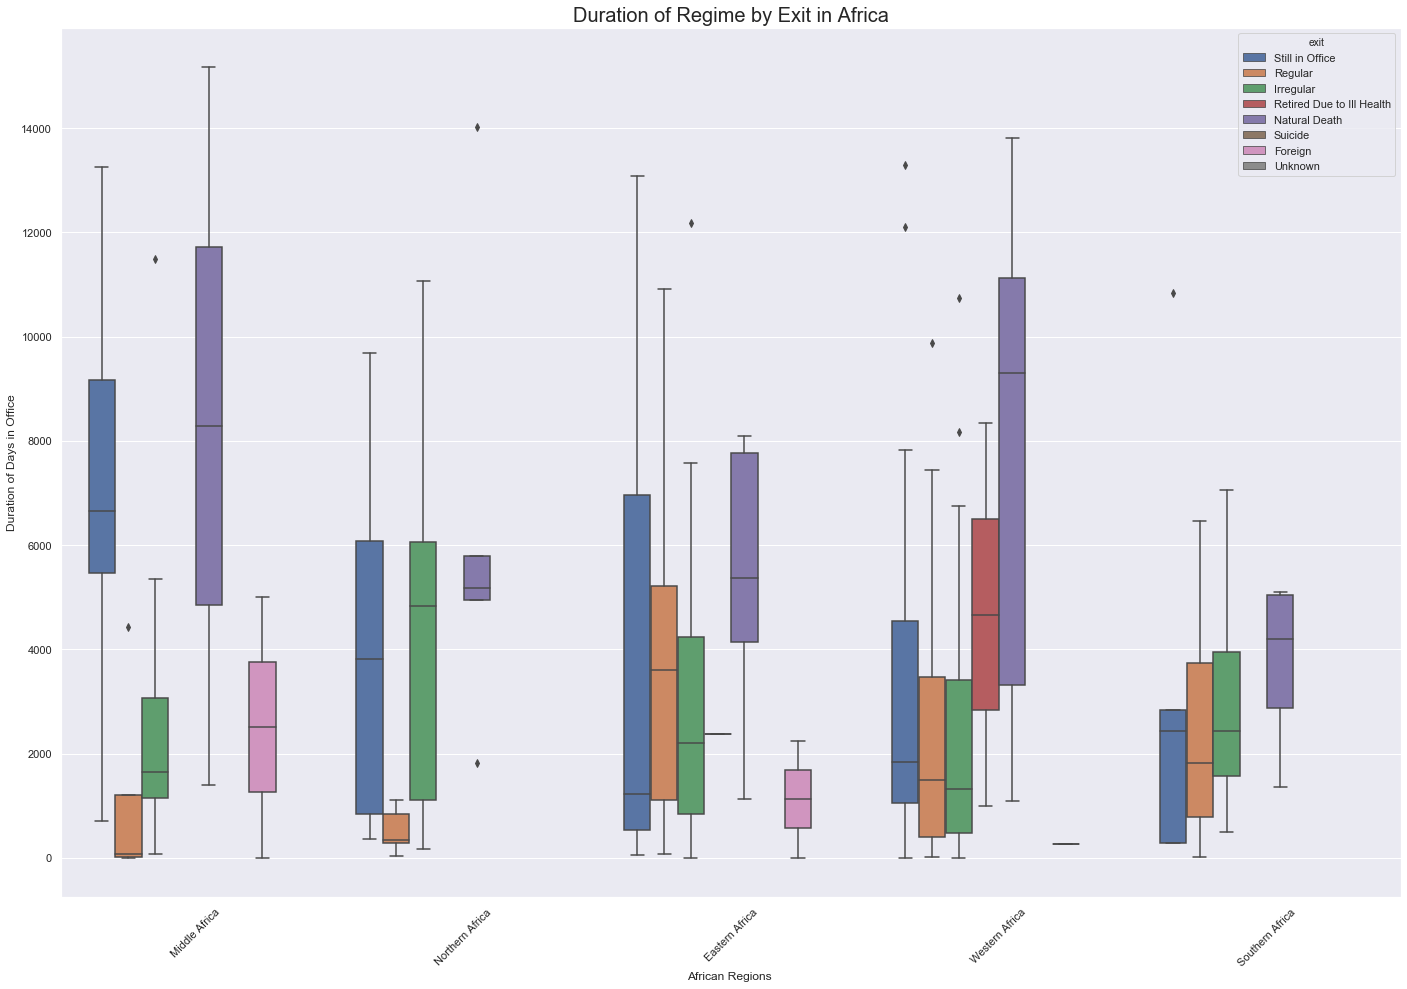

In [37]:
# This graph shows the Duration of "Types of Regime Exit" by World Regions: Africa, Asia, America, Europe, Oceania 

duration_graph = sns.boxplot(x ='worldregion', y ='duration',hue='exit', data = df_duration,
                                order = ['Middle Africa','Northern Africa','Eastern Africa','Western Africa','Southern Africa']) 
sns.set(style="darkgrid")
plt.title('Duration of Regime by Exit in Africa', fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize=12)
plt.xlabel('African Regions ', fontsize=12)
plt.xticks (rotation =45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

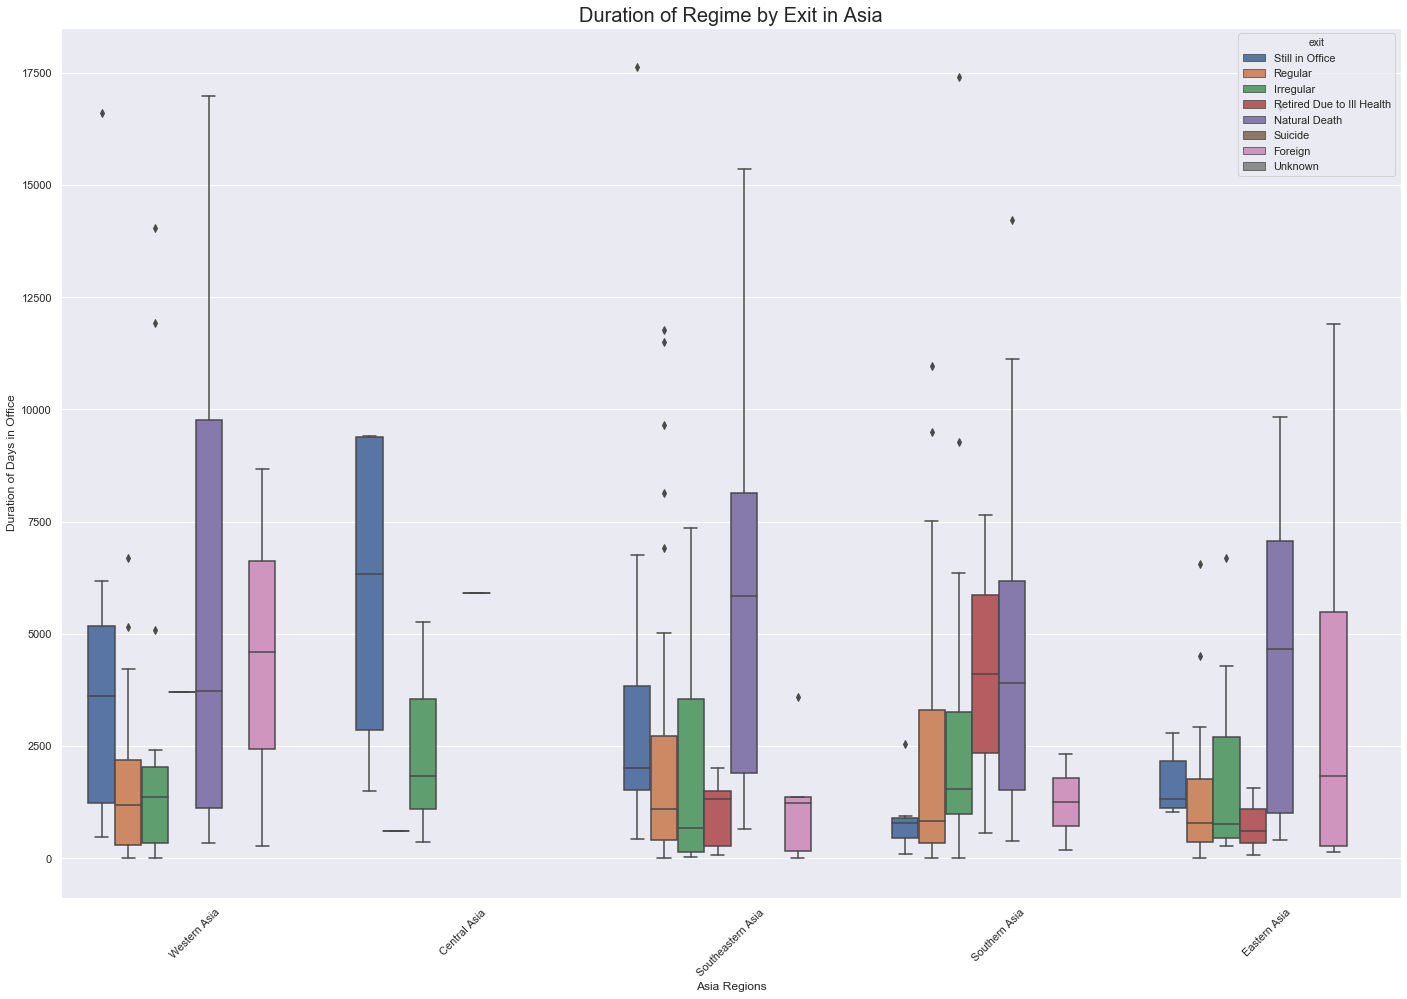

In [38]:
duration_graph = sns.boxplot(x ='worldregion', y ='duration',hue ='exit', data = df_duration,
                                order = ['Western Asia','Central Asia','Southeastern Asia','Southern Asia','Eastern Asia']) 
sns.set(style ="darkgrid")
plt.title('Duration of Regime by Exit in Asia', fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize = 12)
plt.xlabel('Asia Regions', fontsize = 12)
plt.xticks (rotation = 45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

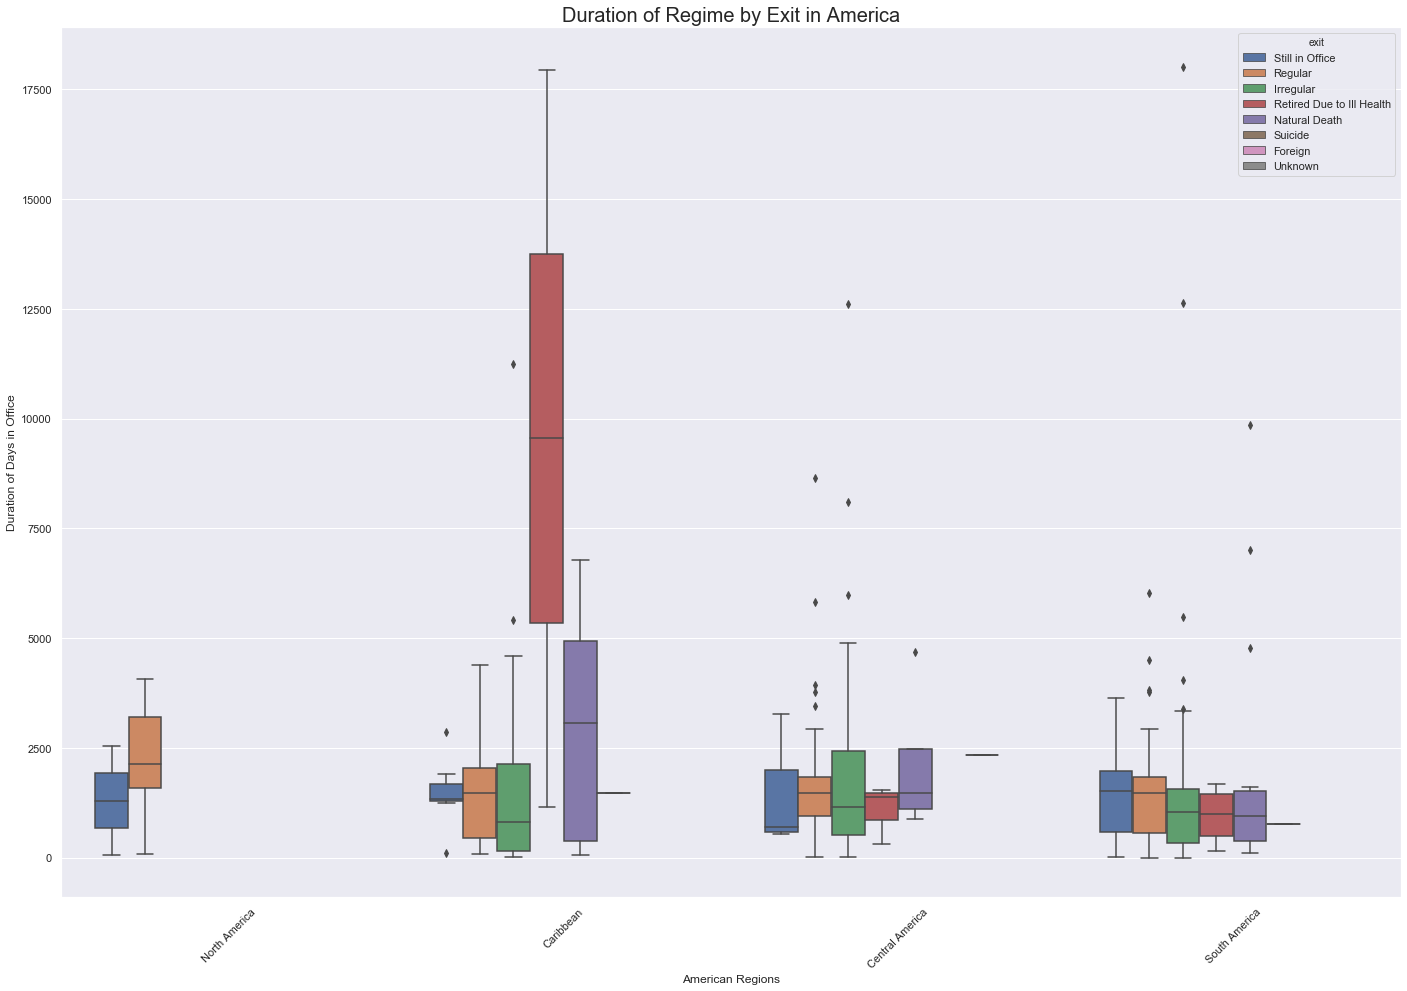

In [39]:
duration_graph = sns.boxplot(x ='worldregion', y ='duration',hue ='exit', data = df_duration,
                                order = ['North America','Caribbean','Central America','South America']) 
sns.set(style="darkgrid")
plt.title('Duration of Regime by Exit in America',fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize = 12)
plt.xlabel('American Regions', fontsize = 12)
plt.xticks (rotation = 45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

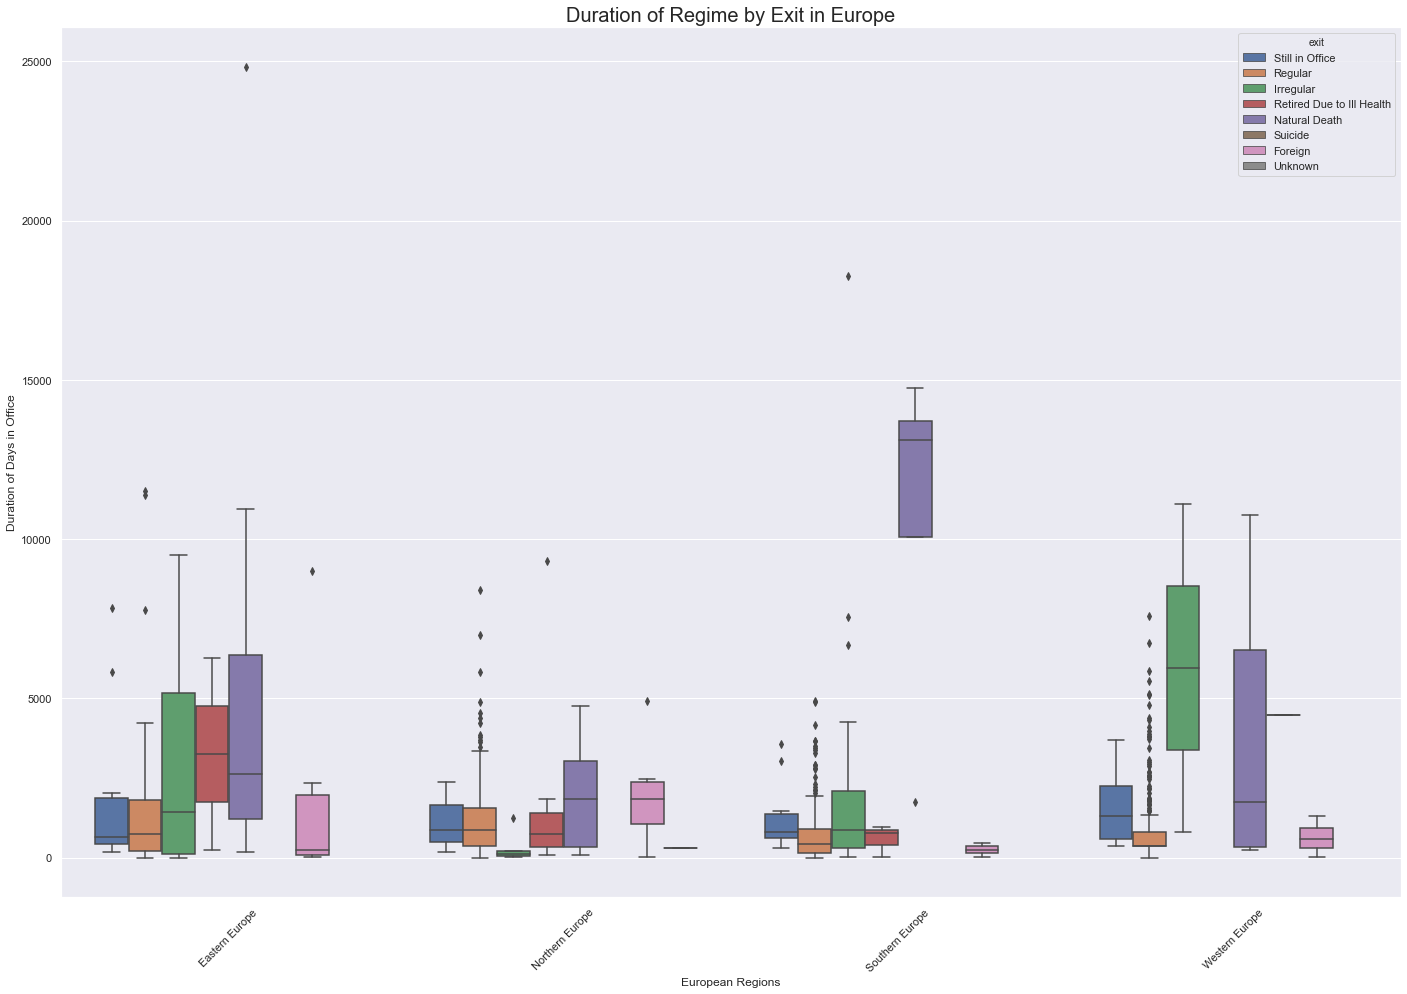

In [40]:
duration_graph = sns.boxplot(x='worldregion', y='duration',hue ='exit', data = df_duration,
                                order = ['Eastern Europe','Northern Europe','Southern Europe','Western Europe']) 
sns.set(style="darkgrid")
plt.title('Duration of Regime by Exit in Europe', fontsize = 20)
plt.ylabel('Duration of Days in Office', fontsize=12)
plt.xlabel('European Regions', fontsize=12)
plt.xticks (rotation =45)
fig = plt.gcf()
fig.set_size_inches(24, 16)
plt.show()

### Other <a class="anchor" id="otber"></a>


Our data has a lot of cateogorical variables, lets examine a few: Method of Leader Entry vs. Method of Exit, Method of Entry vs. Post Tenure Fate, and Method of Exit vs. Post Tenure Fate 

 If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
 If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

For these tests, we will use SciPy Chi2 Contingency package

In [41]:
#Test Regular vs. Irregular Methods of Entry & Exit
#Note that the 2036(Regular) + 255(Irregular)/3409 = 75% of the cases, there is still another 25% of cases to exam
print('Number of Leaders Who Entered Power and Exited Power Irregular:',
      len(working_data[(working_data.entry == 'Irregular') & (working_data.exit == 'Irregular')]))

print('\n')

print('Number of Leaders Who Entered Power and Exited Power Regular:',
      len(working_data[(working_data.entry == 'Regular') & (working_data.exit == 'Regular')]))

Number of Leaders Who Entered Power and Exited Power Irregular: 126


Number of Leaders Who Entered Power and Exited Power Regular: 1261


In [42]:
df_entryexit = pd.get_dummies(working_data, columns=['entry','exit','posttenurefate'])
df_entryexit = df_entryexit.drop(['obsid', 'leadid', 'ccode', 'countrynames', 'worldregion',
       'leader', 'eindate', 'eoutdate', 'exitcode',
       'prevtimesinoffice', 'gender', 'yrborn', 'yrdied', 'borndate',
       'deathdate'], axis=1)
df_entryexit.columns

KeyError: "['numentry' 'numexit' 'numexitcode' 'numposttenurefate' 'fties' 'ftcur'] not found in axis"

In [ ]:
corr = df_entryexit.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_entryexit.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_entryexit.columns)
ax.set_yticklabels(df_entryexit.columns)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.show()